# Homework 3: News, rates scraping

In [130]:
import re
import time
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import parser
from textblob import TextBlob, Word
from scrapy.http import TextResponse
import time
import requests
import pandas as pd
from textblob import TextBlob

# Task 1

In [131]:
url='https://www.tert.am/en'
page=requests.get(url)
response=TextResponse(url=page.url,body=page.text,encoding='utf-8')

In [99]:
headlines=response.css('span.list__title.db::text').extract()
print(headlines[:10])

['European court orders Armenia to pay €1,600,000 in compensation for citizen’s alienated property rights', "Armenian parliamentary delegation’s meetings with top US legislators 'reflects Congress leadership’s positive attitude' – analyst\n\xa0", 'Russian State Duma ratifies amendments to CSTO Charter', 'Armenia to participate in Dubai EXPO 2020', 'Hurghada-Yerevan flight canceled ‘due to tour operator’s failure’ to pay fees', 'Tunisian President Beji Caid Essebsi dies aged 92', "North Korea fires 'new short-range missile' into sea, South Korea says", 'Armenia to participate in Dubai EXPO 2020', 'French inventor crashes into water during failed flight across English Channel on 90mph Hoverboard', 'European court orders Armenia to pay €1,600,000 in compensation for citizen’s alienated property rights']


In [100]:
headlines_string=''.join(headlines)
headline_blob=TextBlob(headlines_string)
headline_blob.words[:10]

WordList(['European', 'court', 'orders', 'Armenia', 'to', 'pay', '€1,600,000', 'in', 'compensation', 'for'])

In [103]:
sw = stopwords.words('english') #setting stopword along

In [104]:
headlines=[i for i in headline_blob.words.lower() if i not in sw]
headlines=pd.Series(headlines)

In [107]:
headlines.value_counts()[:10] #Armenian is the most frequent word, disregarding other unimportant characters/words

’            60
's           27
‘            24
armenian     24
us           17
armenia      17
minister     16
president    15
prime        14
new          11
dtype: int64

In [143]:
#the publication times can be accessed using different css/xpath notations
times1=response.css('span.list__date.db.fb.fs12::text').re('(\d\d):') #choosing only the hours
times2=response.css('span.list__date.db.fb.fs14::text').re('(\d\d):')
times3=response.css('span.list__img-box.db.fl > span::text').re('(\d\d):')
times4=response.css('span.list__date.ver-top-box.fb.fs12::text').re('(\d\d):')

In [144]:
all_times=times1+times2+times3+times4

In [139]:
print(len(all_times))

243


In [145]:
all_times[:5]

['13', '11', '12', '14', '10']

In [148]:
times_series=pd.Series(all_times) #converting to series to find the frequencies
times_series.value_counts()

10    34
11    31
14    29
15    26
13    26
12    25
09    25
16    18
17    15
18    11
19     3
dtype: int64

According to the output, most news are publishing within 10:00-12:00 time interval, and more specifically from 10:00 to 11:00.

In [60]:
count_surname=0
for i in headlines:
    arm_surnames=re.findall("([A-Z].+yan)",i)
    if len(arm_surnames)>0:
        count_surname+=1

In [61]:
count_surname #15 Armenian surnames can be found in news headings

15

In [97]:
for i in headlines:
    arm_surnames=re.findall("([A-Z]\w+yan)",i)
    if arm_surnames:
        print(arm_surnames) #As we can see, Nikol Pashinyan appears more frequently in news headings

['Pashinyan']
['Tovmasyan']
['Nazaryan']
['Pashinyan']
['Pashinyan']
['Pashinyan']
['Pashinyan']
['Pashinyan']
['Pashinyan']
['Pashinyan']
['Pashinyan']
['Tovmasyan']
['Tovmasyan']
['Nazaryan']
['Pashinyan']


# Task 2

In [110]:
all_urls=["https://staff.am/en/jobs?page={}per-page=50".format(i) for i in range(1,14)]
print(all_urls)

['https://staff.am/en/jobs?page=1per-page=50', 'https://staff.am/en/jobs?page=2per-page=50', 'https://staff.am/en/jobs?page=3per-page=50', 'https://staff.am/en/jobs?page=4per-page=50', 'https://staff.am/en/jobs?page=5per-page=50', 'https://staff.am/en/jobs?page=6per-page=50', 'https://staff.am/en/jobs?page=7per-page=50', 'https://staff.am/en/jobs?page=8per-page=50', 'https://staff.am/en/jobs?page=9per-page=50', 'https://staff.am/en/jobs?page=10per-page=50', 'https://staff.am/en/jobs?page=11per-page=50', 'https://staff.am/en/jobs?page=12per-page=50', 'https://staff.am/en/jobs?page=13per-page=50']


In [111]:
def company_scraper(url):
    page2=requests.get(url)
    response2=TextResponse(url=page2.url,body=page2.text,encoding='utf-8')
    companies=response2.css(' p.job_list_company_title::text').extract()
    return companies

In [112]:
all_companies=[]
for i in all_urls:
    all_companies.extend(company_scraper(i))

In [113]:
print(all_companies[:20])

[' Children of Armenia Charitable Fund', 'Acmetel USA LLC', 'All.me LLC', 'Digitain ', 'ՀՀ Վարչապետի աշխատակազմի Անվտանգության խորհրդի գրասենյակ', 'SEASONS', 'International Republican Institute', 'BetConstruct', 'BetConstruct', 'BetConstruct', 'Galaxy Group of Companies', 'BetConstruct', '2mindS', 'ՀՀ Վարչապետի աշխատակազմի Անվտանգության խորհրդի գրասենյակ', 'ՀՀ Վարչապետի աշխատակազմի Անվտանգության խորհրդի գրասենյակ', 'IYC technologies', 'All.me LLC', 'GAT Cutting LLC', 'Workfront Armenia', 'All.me LLC']


In [114]:
len(all_companies)

646

In [115]:
def job_scraper(url):
    page=requests.get(url)
    response=TextResponse(url=page.url,body=page.text,encoding='utf-8')
    jobs=response.css('div.job-inner.job-item-title > p.font_bold::text').extract()
    return jobs

In [116]:
all_jobs=[]
for i in all_urls:
    all_jobs.extend(job_scraper(i))

In [117]:
print(all_jobs[:10])

['COAF SMART Visitor Center Attendant', 'International Account Manager - SMS', 'Senior Node.js Developer', 'DevOps Engineer', 'Ռազմաքաղաքական համագործակցության բաժնի գլխավոր մասնագետ', 'Restaurant barman', 'Senior Program Manager (SPM)', 'Customer Support Agent –English/Russian Languages (Mixed shifts)', 'Customer Support Agent – French Language (Mixed shift)', 'Customer Support Agent – German Language (Mixed shifts)']


In [118]:
df=pd.DataFrame({"Company":all_companies,"Job":all_jobs})

In [119]:
df.head()

,Company,Job
0,Children of Armenia Charitable Fund,COAF SMART Visitor Center Attendant
1,Acmetel USA LLC,International Account Manager - SMS
2,All.me LLC,Senior Node.js Developer
3,Digitain,DevOps Engineer
4,ՀՀ Վարչապետի աշխատակազմի Անվտանգության խորհրդի...,Ռազմաքաղաքական համագործակցության բաժնի գլխավոր...


In [120]:
df.Company.value_counts()[:5]
#Ministry of education has the highest number of job postings = 38

ՀՀ կրթության, գիտության, մշակույթի և սպորտի նախարարություն    38
BetConstruct                                                  23
Digitain                                                      21
All.me LLC                                                    17
Synopsys Armenia                                              15
Name: Company, dtype: int64

In [121]:
df2=df[df['Job'].str.contains("(?i)Developer")] #ignoring case-sensitivity
df2[:10]

,Company,Job
2,All.me LLC,Senior Node.js Developer
15,IYC technologies,Mid/Senior Front-End Developer
27,TIDEPOOL LABS,"Node.js, React.js Developer"
45,SFL,iOS Developer
50,BetConstruct,PHP Developer
54,STDev,PHP developer
56,STDev,Windows UWP Developer
59,FLUX Technologies,Senior Java Script Developer
69,gg,Mid Level iOS Developer
73,SoloLearn,Junior Android Developer


In [122]:
df2['Company'].value_counts()[:10]
#Helpsystems Armenia has the highest number of developer-related job postings

HelpSystems Armenia                     5
BetConstruct                            4
STDev                                   4
Energize Global Services                3
SoloLearn                               3
Web Apricot Internet Services Agency    3
Digitain                                3
Willing & Able Operations LLC           2
AOByte                                  2
Webb Fontaine Holding LLC               2
Name: Company, dtype: int64

# Task 3. Rates.am

First, I will try to find the average usd rate from the certain date using different functions/methods. The pd.read_html() function will be applied to load the table of exchange rates to the jupyter workspace. Later, I will define cutomized function which will iterate over all dates and will extract the average USD rate across the period.

In [123]:
dates1=['http://rates.am/am/armenian-dram-exchange-rates/banks/non-cash/2019/07/0{}/16-30'.format(i) for i in range(1,10)] #defining dates

In [124]:
dates2=['http://rates.am/am/armenian-dram-exchange-rates/banks/non-cash/2019/07/{}/16-30'.format(i) for i in range(10,15)] #defining dates

In [34]:
all_dates=dates1+dates2

In [150]:
rates2=pd.read_html('http://rates.am/am/armenian-dram-exchange-rates/banks/non-cash/2019/07/01/16-30') #loading a table to get exchange rates
rates=rates2[3] 
rates #looking at the table

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,NaN,Բանկ,Բանկ,Մասնաճյուղեր,Ամսաթիվ,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,NaN,NaN
1,NaN,Բանկ,Բանկ,Մասնաճյուղեր,Ամսաթիվ,Առք,Վաճ.,Առք,Վաճ.,Առք,Վաճ.,Առք,Վաճ.,NaN,NaN
2,1.,ԱյԴի Բանկ,NaN,14,"01 Հլս, 16:30",475,478.50,537,544,7.50,7.66,597,617,NaN,NaN
3,2.,Յունիբանկ,NaN,48,"01 Հլս, 16:30",475,479,535,545,7.45,7.75,597,611,NaN,NaN
4,3.,Արմսվիսբանկ,NaN,1,"01 Հլս, 16:30",476,478,539,544,7.52,7.67,603,609,NaN,NaN
5,4.,ՎՏԲ-Հայաստան Բանկ,NaN,69,"01 Հլս, 16:30",475.50,478,537.50,542.50,7.51,7.60,601,612,NaN,NaN
6,5.,ՀԱՅԲԻԶՆԵՍԲԱՆԿ,NaN,55,"01 Հլս, 16:30",475,478.50,536,544,7.47,7.72,599,611,NaN,NaN
7,6.,Էվոկաբանկ,NaN,12,"01 Հլս, 16:30",475.50,478.50,537,543,7.53,7.63,600,610,NaN,NaN
8,7.,Կոնվերս Բանկ,NaN,36,"01 Հլս, 16:30",475.50,479,537,544,7.52,7.69,601,610,NaN,NaN
9,8.,Էյչ-Էս-Բի-Սի Բանկ,NaN,9,"01 Հլս, 16:30",475.50,478.50,537,544,7.47,7.64,599,607,NaN,NaN


In [151]:
rates=rates.drop([0,2,13,14],axis=1).reset_index(drop=True)
rates

,1,3,4,5,6,7,8,9,10,11,12
0,Բանկ,Մասնաճյուղեր,Ամսաթիվ,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...,1 USD \t1 EUR \t1 RUR \t1 GBP \t1 GEL \t1 CHF ...
1,Բանկ,Մասնաճյուղեր,Ամսաթիվ,Առք,Վաճ.,Առք,Վաճ.,Առք,Վաճ.,Առք,Վաճ.
2,ԱյԴի Բանկ,14,"01 Հլս, 16:30",475,478.50,537,544,7.50,7.66,597,617
3,Յունիբանկ,48,"01 Հլս, 16:30",475,479,535,545,7.45,7.75,597,611
4,Արմսվիսբանկ,1,"01 Հլս, 16:30",476,478,539,544,7.52,7.67,603,609
5,ՎՏԲ-Հայաստան Բանկ,69,"01 Հլս, 16:30",475.50,478,537.50,542.50,7.51,7.60,601,612
6,ՀԱՅԲԻԶՆԵՍԲԱՆԿ,55,"01 Հլս, 16:30",475,478.50,536,544,7.47,7.72,599,611
7,Էվոկաբանկ,12,"01 Հլս, 16:30",475.50,478.50,537,543,7.53,7.63,600,610
8,Կոնվերս Բանկ,36,"01 Հլս, 16:30",475.50,479,537,544,7.52,7.69,601,610
9,Էյչ-Էս-Բի-Սի Բանկ,9,"01 Հլս, 16:30",475.50,478.50,537,544,7.47,7.64,599,607


In [152]:
rates=rates.drop([1,19],axis=0).reset_index(drop=True) #deleting unimportant rows

In [154]:
rates.columns=rates.iloc[0]

In [155]:
rates=rates.reindex(rates.index.drop(0))

In [156]:
rates

,Բանկ,Մասնաճյուղեր,Ամսաթիվ,1 USD 1 EUR 1 RUR 1 GBP 1 GEL 1 CHF 1 CAD 1 AED 1 CNY 1 AUD 10 JPY 1 SEK 1 HKD 10 KZT 1 XAU,1 USD 1 EUR 1 RUR 1 GBP 1 GEL 1 CHF 1 CAD 1 AED 1 CNY 1 AUD 10 JPY 1 SEK 1 HKD 10 KZT 1 XAU,1 USD 1 EUR 1 RUR 1 GBP 1 GEL 1 CHF 1 CAD 1 AED 1 CNY 1 AUD 10 JPY 1 SEK 1 HKD 10 KZT 1 XAU,1 USD 1 EUR 1 RUR 1 GBP 1 GEL 1 CHF 1 CAD 1 AED 1 CNY 1 AUD 10 JPY 1 SEK 1 HKD 10 KZT 1 XAU,1 USD 1 EUR 1 RUR 1 GBP 1 GEL 1 CHF 1 CAD 1 AED 1 CNY 1 AUD 10 JPY 1 SEK 1 HKD 10 KZT 1 XAU,1 USD 1 EUR 1 RUR 1 GBP 1 GEL 1 CHF 1 CAD 1 AED 1 CNY 1 AUD 10 JPY 1 SEK 1 HKD 10 KZT 1 XAU,1 USD 1 EUR 1 RUR 1 GBP 1 GEL 1 CHF 1 CAD 1 AED 1 CNY 1 AUD 10 JPY 1 SEK 1 HKD 10 KZT 1 XAU,1 USD 1 EUR 1 RUR 1 GBP 1 GEL 1 CHF 1 CAD 1 AED 1 CNY 1 AUD 10 JPY 1 SEK 1 HKD 10 KZT 1 XAU
1,ԱյԴի Բանկ,14,"01 Հլս, 16:30",475,478.50,537,544,7.50,7.66,597,617
2,Յունիբանկ,48,"01 Հլս, 16:30",475,479,535,545,7.45,7.75,597,611
3,Արմսվիսբանկ,1,"01 Հլս, 16:30",476,478,539,544,7.52,7.67,603,609
4,ՎՏԲ-Հայաստան Բանկ,69,"01 Հլս, 16:30",475.50,478,537.50,542.50,7.51,7.60,601,612
5,ՀԱՅԲԻԶՆԵՍԲԱՆԿ,55,"01 Հլս, 16:30",475,478.50,536,544,7.47,7.72,599,611
6,Էվոկաբանկ,12,"01 Հլս, 16:30",475.50,478.50,537,543,7.53,7.63,600,610
7,Կոնվերս Բանկ,36,"01 Հլս, 16:30",475.50,479,537,544,7.52,7.69,601,610
8,Էյչ-Էս-Բի-Սի Բանկ,9,"01 Հլս, 16:30",475.50,478.50,537,544,7.47,7.64,599,607
9,ԱՐԱՐԱՏԲԱՆԿ,48,"01 Հլս, 16:30",475,478.50,535,546,7.49,7.70,591,615
10,Արցախբանկ,24,"01 Հլս, 16:30",475.50,479,537,546,7.46,7.68,599,612


In [157]:
rates=rates.set_index(list(rates.columns[[0]])) #setting the first column as index

In [158]:
rates.columns=['Branch','Date','1_USD_Sell','1_USD_Buy','1_EUR_Sell','1_EUR_Buy','1_RUR_Sell','1_RUR_Buy','1_GBP_Sell','1_GBP_Buy']

In [160]:
rates=rates.iloc[:,2:10].astype(float)

In [161]:
rates

,1_USD_Sell,1_USD_Buy,1_EUR_Sell,1_EUR_Buy,1_RUR_Sell,1_RUR_Buy,1_GBP_Sell,1_GBP_Buy
Բանկ,,,,,,,,
ԱյԴի Բանկ,475.0,478.5,537.0,544.0,7.50,7.66,597.0,617.0
Յունիբանկ,475.0,479.0,535.0,545.0,7.45,7.75,597.0,611.0
Արմսվիսբանկ,476.0,478.0,539.0,544.0,7.52,7.67,603.0,609.0
ՎՏԲ-Հայաստան Բանկ,475.5,478.0,537.5,542.5,7.51,7.60,601.0,612.0
ՀԱՅԲԻԶՆԵՍԲԱՆԿ,475.0,478.5,536.0,544.0,7.47,7.72,599.0,611.0
Էվոկաբանկ,475.5,478.5,537.0,543.0,7.53,7.63,600.0,610.0
Կոնվերս Բանկ,475.5,479.0,537.0,544.0,7.52,7.69,601.0,610.0
Էյչ-Էս-Բի-Սի Բանկ,475.5,478.5,537.0,544.0,7.47,7.64,599.0,607.0
ԱՐԱՐԱՏԲԱՆԿ,475.0,478.5,535.0,546.0,7.49,7.70,591.0,615.0


In [162]:
rates['1_USD_Buy'].mean()

478.5882352941176

In [198]:
def avg_usd_scrape(url):
    """defining a function to calculate averages across all dates"""
    rate=pd.read_html(url) #loading a table
    rates=rate[3] #taking the 3rd table, with currencies
    rates=rates.drop([0,2,13,14],axis=1).reset_index(drop=True) #dropping unimportant columns
    rates=rates.drop([1,19],axis=0).reset_index(drop=True) #deleting unimportant rows
    rates.columns=rates.iloc[0] #setting the index of the columns
    rates=rates.reindex(rates.index.drop(0)) #deleting and reindexing the removed row
    rates=rates.set_index(list(rates.columns[[0]])) #setting the first column as index
    rates.columns=['Branch','Date','1_USD_Sell','1_USD_Buy','1_EUR_Sell','1_EUR_Buy','1_RUR_Sell','1_RUR_Buy','1_GBP_Sell','1_GBP_Buy']
    rates=rates.iloc[:,2:10].astype(float) #converting the values to floats
    usd_buy_mean=rates['1_USD_Buy'].mean()
    return usd_buy_mean

In [168]:
avg_usd_scrape('http://rates.am/am/armenian-dram-exchange-rates/banks/non-cash/2019/07/01/16-30') #just checking if it works

478.5882352941176

In [173]:
all_usd_avg=[]
for i in all_dates:
    all_usd_avg.append(avg_usd_scrape(i))

[478.5882352941176]
[478.5882352941176, 478.47058823529414]
[478.5882352941176, 478.47058823529414, 478.47058823529414]
[478.5882352941176, 478.47058823529414, 478.47058823529414, 478.44117647058823]
[478.5882352941176, 478.47058823529414, 478.47058823529414, 478.44117647058823, 478.52941176470586]
[478.5882352941176, 478.47058823529414, 478.47058823529414, 478.44117647058823, 478.52941176470586, 478.52941176470586]
[478.5882352941176, 478.47058823529414, 478.47058823529414, 478.44117647058823, 478.52941176470586, 478.52941176470586, 478.52941176470586]
[478.5882352941176, 478.47058823529414, 478.47058823529414, 478.44117647058823, 478.52941176470586, 478.52941176470586, 478.52941176470586, 478.5]
[478.5882352941176, 478.47058823529414, 478.47058823529414, 478.44117647058823, 478.52941176470586, 478.52941176470586, 478.52941176470586, 478.5, 478.38235294117646]
[478.5882352941176, 478.47058823529414, 478.47058823529414, 478.44117647058823, 478.52941176470586, 478.52941176470586, 478.52

In [174]:
all_usd_avg

[478.5882352941176,
 478.47058823529414,
 478.47058823529414,
 478.44117647058823,
 478.52941176470586,
 478.52941176470586,
 478.52941176470586,
 478.5,
 478.38235294117646,
 478.38235294117646,
 478.3382352941176,
 478.3235294117647,
 478.3529411764706,
 478.3529411764706]

In [181]:
np.mean(all_usd_avg) #the average usd_buy_rate rate for July 1-14

478.44222689075633

(478, 479)

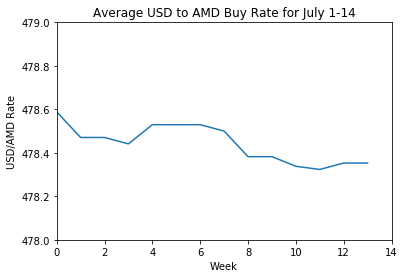

In [196]:
plt.plot(all_usd_avg)
plt.xlabel('Week')
plt.ylabel('USD/AMD Rate')
plt.title('Average USD to AMD Buy Rate for July 1-14')
plt.xlim(0,14)
plt.ylim(478,479)

As the graph output shows, there was not much fluctuation in USD Buy rate. It was mostly fluctuating between 478.4 and 478.6.